# Pymaceuticals Inc.
---

### Analysis

- There were a few takeaways from this study of note. Capomulin was of course the main interest of the study and of Pymaceuticals, Inc. The purpose of the study was to analyze the study and compare the effectiveness of Capomulin against other alternative treatment options. After gathering the collected data into a summary, Ramicane was the only treatment that mirrored the average tumor volume results of Capomulin. It also featured a lower mean tumor volume and similar numbers for standard error and variance. The difference is visually striking when viewed on a bar chart. It was also noted that Capomulin's treatment effect appears to have a great change in level between days 25 and 35 when viewed as a time series line graph. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
combined_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(combined_study["Mouse ID"].value_counts())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_study.loc[combined_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique() 
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_id = 'g989'
duplicate_data = combined_study.loc[combined_study['Mouse ID'] == mouse_id]
duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# cleaned_study = combined_study.drop_duplicates(subset="Mouse ID")
# cleaned_study

cleaned_study = combined_study.drop(combined_study[combined_study['Mouse ID'] == 'g989'].index)
cleaned_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(cleaned_study["Mouse ID"].value_counts())
cleaned_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_mean = combined_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_median = combined_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_var = combined_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_std = combined_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_sem = combined_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": summary_mean,
    "Median Tumor Volume": summary_median,
    "Tumor Volume Variance": summary_var,
    "Tumor Volume Std. Dev.": summary_std,
    "Tumor Volume Std. Err.": summary_sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
combined_study.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = combined_study.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":[
    'mean', 'median', 'var', 'std', 'sem']})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

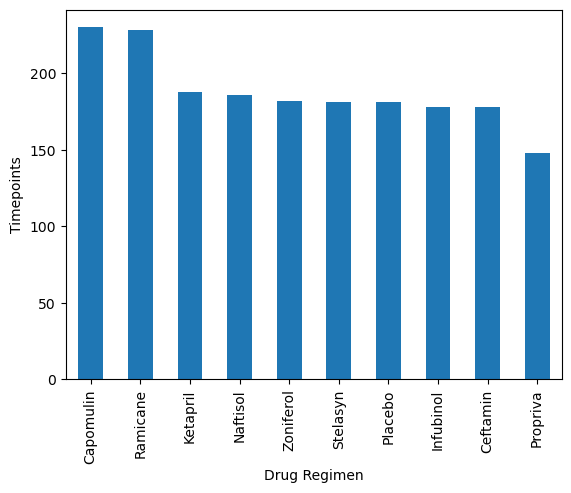

In [10]:
counts = cleaned_study['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.ylabel('Timepoints')
plt.show()

In [11]:
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

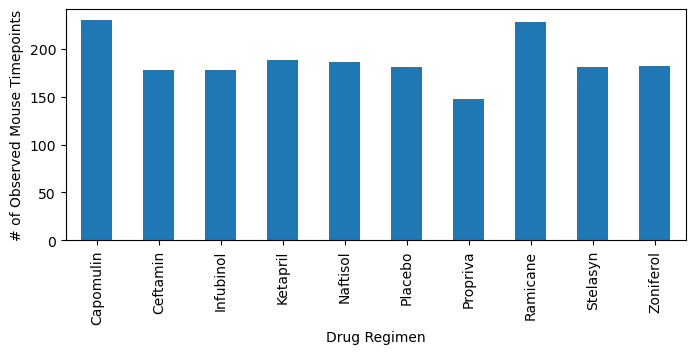

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


cleaned_study.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar', figsize=(8,3), xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')
plt.show()



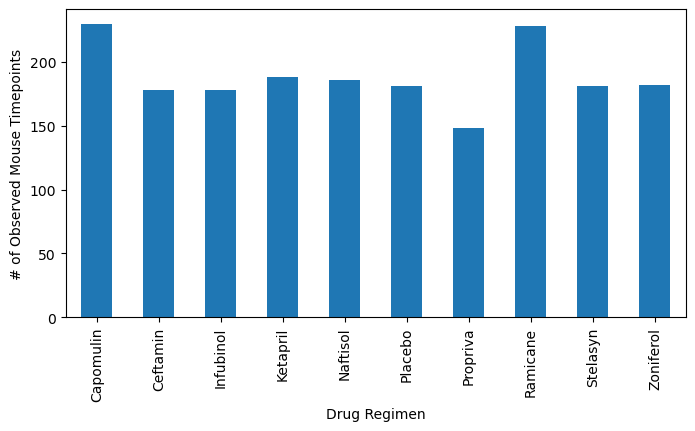

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


cleaned_study.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar', figsize=(8, 4))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


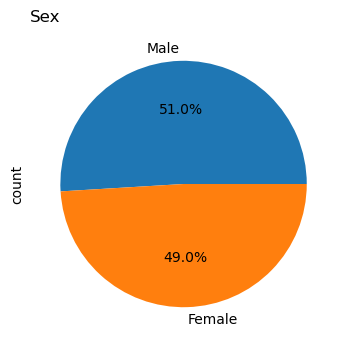

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


cleaned_study["Sex"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.title('Sex', loc='left')
plt.show()


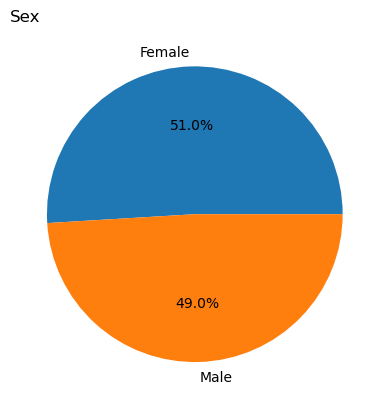

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(cleaned_study["Sex"].value_counts(), labels=cleaned_study["Sex"].unique(), autopct='%1.1f%%')
plt.title('Sex', loc='left')  
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

max_tumor_volume = cleaned_study.groupby('Mouse ID')['Timepoint'].max()
max_tumor_volume=max_tumor_volume.reset_index()
max_tumor_volume


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = max_tumor_volume.merge(cleaned_study,on=['Mouse ID','Timepoint'],how='left')
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged['Drug Regimen'].unique()

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    treatment_data = merged[merged['Drug Regimen'] == treatment]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)



# Locate the rows which contain mice on each drug and get the tumor volumes


    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The interquartile range is: {iqr}")
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(tumor_volumes < lowerq - 1.5 * iqr) | (tumor_volumes > upperq + 1.5 * iqr)]
    
    # Print potential outliers
    print(f"'{treatment}'s potential outliers: {outliers}")


The interquartile range is: 7.781863460000004
'Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
The interquartile range is: 9.098536719999998
'Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
The interquartile range is: 11.477135160000003
'Infubinol's potential outliers:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  
The interquartile range is: 15.577752179999997
'Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


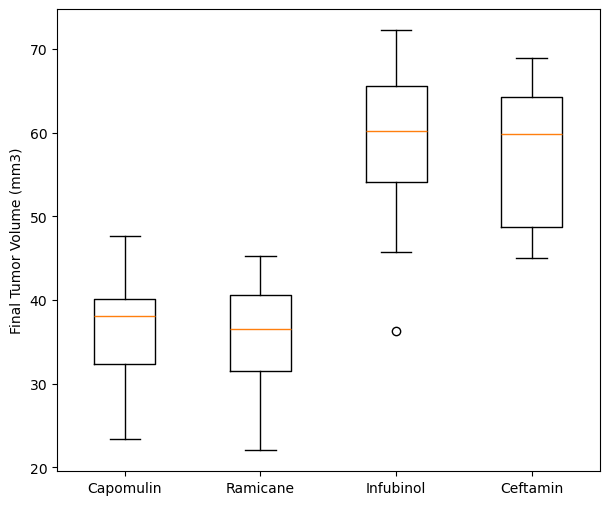

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [62]:
capomulin_data = merged[merged['Drug Regimen'] == 'Capomulin']
capomulin_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22


In [63]:
merged[(merged['Mouse ID'] == 'b128')]['Drug Regimen'].unique()

array(['Capomulin'], dtype=object)

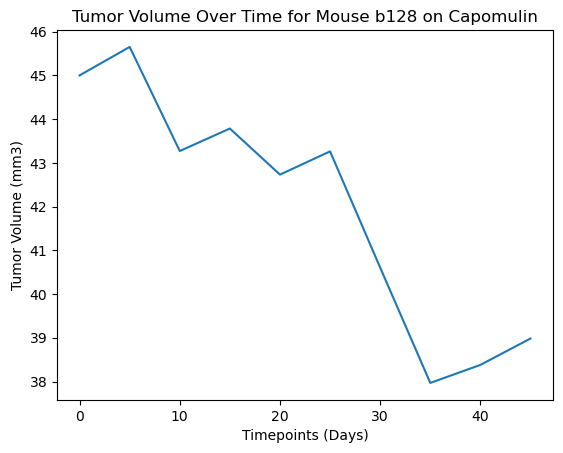

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'b128'

mouse_data = cleaned_study[(cleaned_study['Mouse ID'] == mouse_id) & (cleaned_study['Drug Regimen'] == 'Capomulin')]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.xlabel('Timepoints (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time for Mouse b128 on Capomulin')
plt.show()

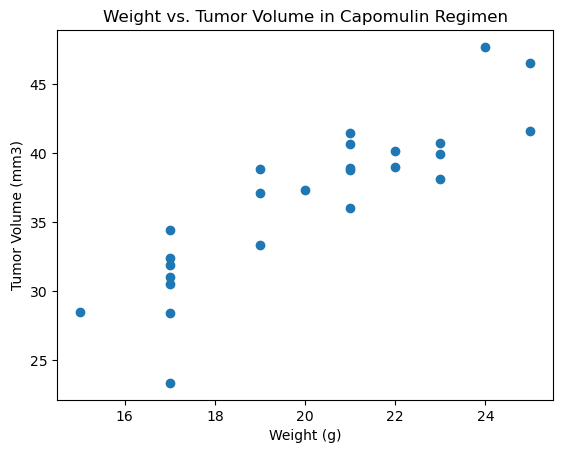

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs. Tumor Volume in Capomulin Regimen')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.88


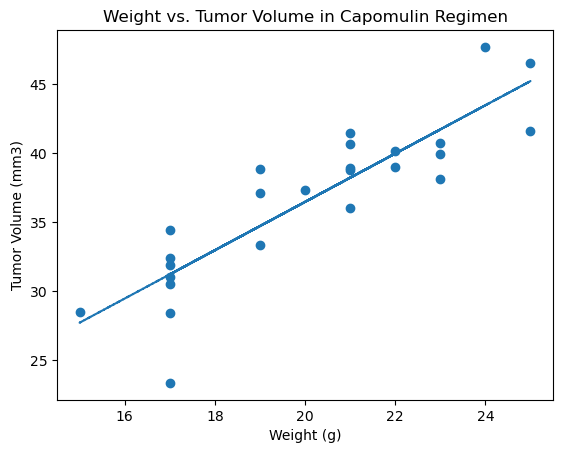

In [70]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = capomulin_data['Weight (g)']
tumor_volume = capomulin_data['Tumor Volume (mm3)']
slope, intercept, r, p, std_err = st.linregress(weight, tumor_volume)
fit = slope * weight + intercept

print(f"Correlation Coefficient: {r:.2f}")

plt.scatter(weight, tumor_volume)
plt.plot(weight, fit, "--")  

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs. Tumor Volume in Capomulin Regimen')
plt.show()